In [17]:
start = '2021-01-01'
end = '2024-01-24'
tickers = ['META', 'TSLA','AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA']

data = yf.download(tickers, start=start, end=end)['Adj Close'][tickers]
data

[*********************100%%**********************]  7 of 7 completed


Ticker,META,TSLA,AAPL,MSFT,AMZN,GOOGL,NVDA
Date,,,,,,,
2021-01-04,268.654968,243.256668,127.002090,211.605316,159.331497,86.306503,130.833954
2021-01-05,270.682800,245.036667,128.572327,211.809418,160.925507,87.002502,133.739792
2021-01-06,263.030914,251.993332,124.244385,206.317368,156.919006,86.143997,125.855423
2021-01-07,268.455170,272.013336,128.484009,212.188553,158.108002,88.717003,133.133682
2021-01-08,267.286407,293.339996,129.592987,213.481354,159.134995,89.891502,132.462753
...,...,...,...,...,...,...,...
2024-01-17,367.979553,215.550003,182.447189,388.751099,151.710007,141.470001,560.503723
2024-01-18,375.731354,211.880005,188.389618,393.142975,153.500000,143.479996,571.043213
2024-01-19,383.043610,212.190002,191.315872,397.934143,155.339996,146.380005,594.882080


In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

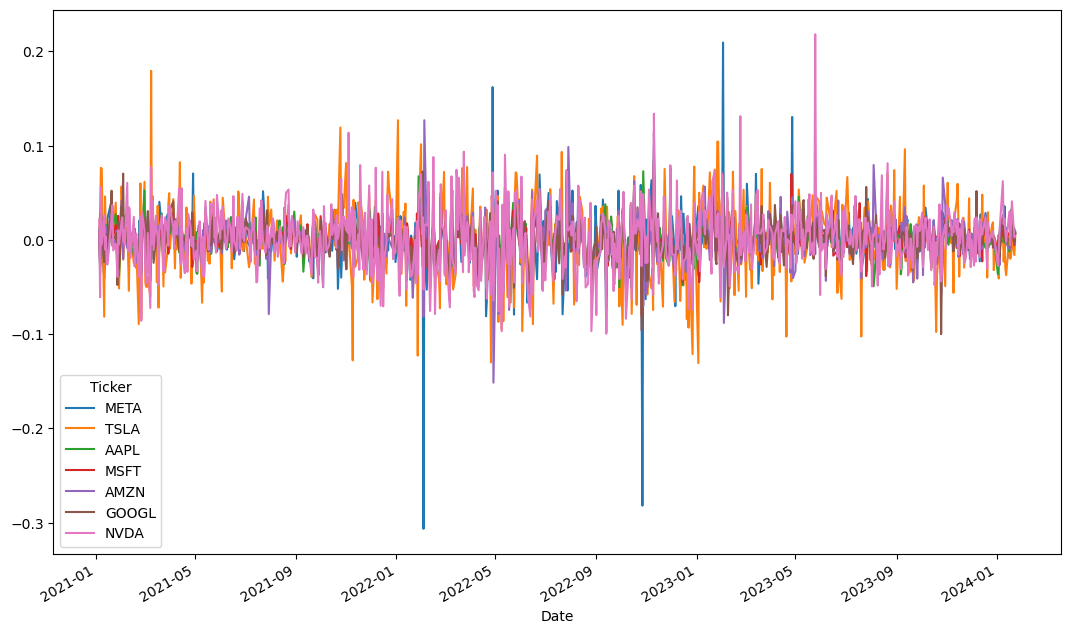

In [6]:
daily_log_returns = np.log(data) - np.log(data.shift(1))
daily_log_returns.plot(figsize=(13, 8))

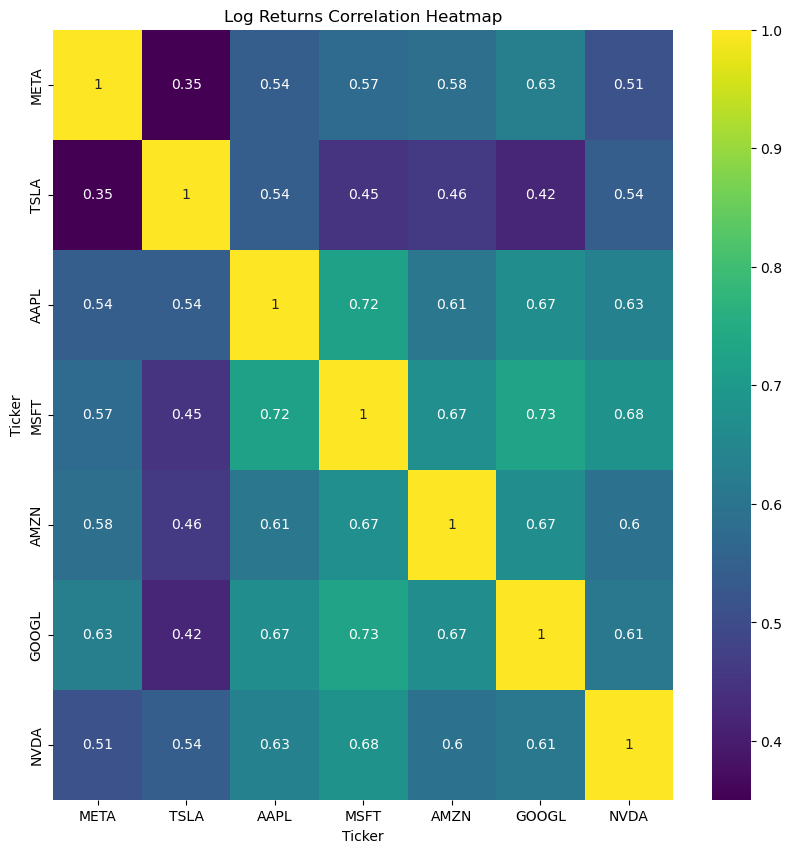

In [10]:
corr = daily_log_returns.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title('Log Returns Correlation Heatmap')
plt.show()

In [11]:
stocks = len(tickers)
weights = np.full((stocks,), 1 / stocks)

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


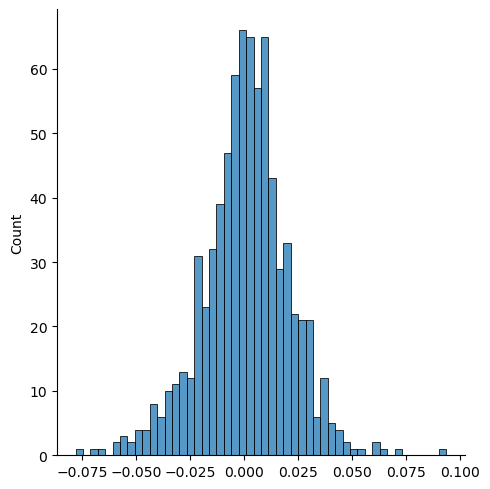

In [12]:
daily_portfolio_returns = daily_log_returns.dot(weights)
sns.displot(daily_portfolio_returns, bins=50)

In [13]:
expected_return = daily_portfolio_returns.mean() * 252
vol = daily_portfolio_returns.std() * np.sqrt(252)
skew = daily_portfolio_returns.skew()
sr = expected_return / vol

print(f"{expected_return=}")
print(f"{vol=}")
print(f"{skew=}")
print(f"{sr=}")

expected_return=0.15495379737287165
vol=0.3183505670368267
skew=-0.1420781837200404
sr=0.4867395048646062


In [14]:
returns = daily_log_returns
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * np.sqrt(252)

# Assuming 'tickers', 'mean_returns', and 'cov_matrix' are already defined
num_portfolios = 10000

# DataFrame to store the results
results = pd.DataFrame(columns=['returns', 'volatility', 'sharpe', 'weights'], index=range(num_portfolios))
# store all weights
weights_record = []

for i in range(num_portfolios):
		# Normalised randomly generated weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

		# Calculate returns and volatility
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

		# Store results
    results.loc[i, 'returns'] = returns
    results.loc[i, 'volatility'] = volatility
    results.loc[i, 'sharpe'] = results.loc[i, 'returns'] / results.loc[i, 'volatility']
    results.loc[i, 'weights'] = ','.join(str(np.round(weight, 4)) for weight in weights)
		# record weights
    weights_record.append(weights)
    
print(results.sort_values('sharpe', ascending=False).head(10))

       returns volatility    sharpe  \
3573  0.380211   0.105873  3.591182   
491   0.322902   0.091332  3.535485   
1385  0.285844   0.082715  3.455792   
7900  0.281593   0.082712  3.404508   
4864  0.274112   0.081926  3.345847   
2737  0.281695   0.084402   3.33753   
2359  0.251656   0.075842  3.318183   
9211  0.281556   0.085018  3.311728   
9518  0.269375    0.08198  3.285843   
809   0.268718   0.081784  3.285708   

                                               weights  
3573  0.0095,0.0482,0.0424,0.1432,0.0154,0.0757,0.6657  
491   0.0022,0.0311,0.0507,0.2603,0.0288,0.1541,0.4727  
1385  0.0022,0.0153,0.3215,0.2115,0.0056,0.0758,0.3681  
7900   0.0823,0.0049,0.108,0.3339,0.0216,0.1134,0.3359  
4864  0.0173,0.0311,0.0231,0.3252,0.0262,0.2632,0.3141  
2737   0.0603,0.0297,0.091,0.3184,0.0357,0.1077,0.3572  
2359    0.0264,0.0135,0.1932,0.325,0.0006,0.2033,0.238  
9211    0.0676,0.036,0.1257,0.3134,0.0344,0.057,0.3659  
9518    0.0105,0.0441,0.0738,0.304,0.034,0.2145,0.3192  


In [15]:
# Efficient Frontier with max sharpe portfolio and min volatility portfolio
max_sharpe_portfolio = results.iloc[pd.to_numeric(results['sharpe']).idxmax()]
min_volatility_portfolio = results.iloc[pd.to_numeric(results['volatility']).idxmin()]

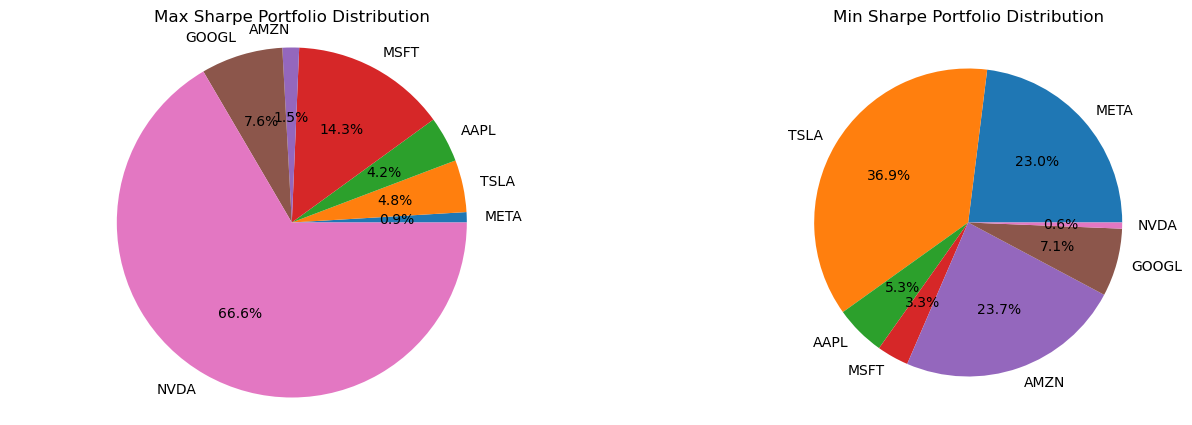

In [16]:
# Get rows with max and min 'sharpe' values
row_max = results.sort_values('sharpe', ascending=False).head(1)
row_min = results.sort_values('sharpe').head(1)

# Split the weights strings and convert to floats
weights_max = [float(x) for x in row_max['weights'].iloc[0].split(',')]
weights_min = [float(x) for x in row_min['weights'].iloc[0].split(',')]

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# Plotting the max sharpe pie chart
axs[0].pie(weights_max, labels=tickers, autopct='%1.1f%%')
axs[0].set_title('Max Sharpe Portfolio Distribution')
axs[0].axis('equal')  # Equal aspect ratio

# Plotting the min sharpe pie chart
axs[1].pie(weights_min, labels=tickers, autopct='%1.1f%%')
axs[1].set_title('Min Sharpe Portfolio Distribution')
plt.show()

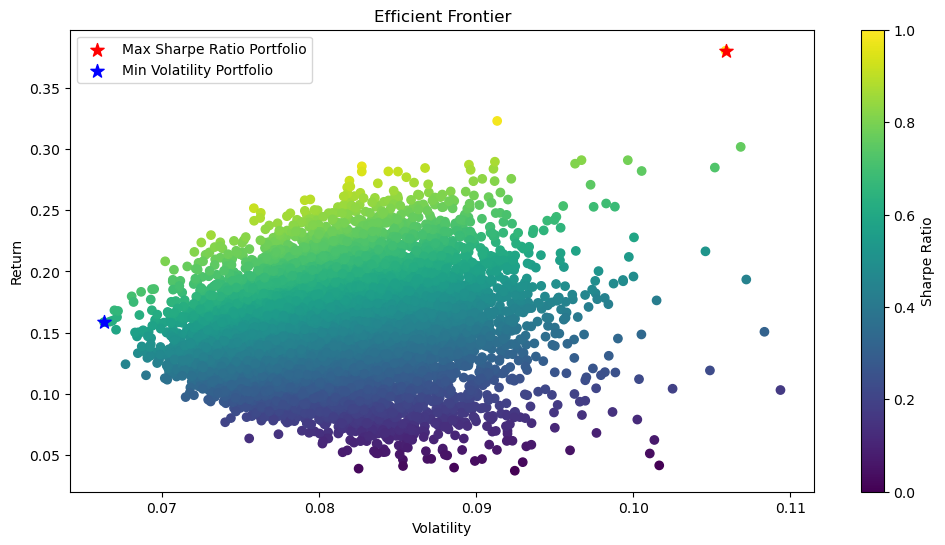

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(results['volatility'], results['returns'], c=results['sharpe'], cmap='viridis')
plt.scatter(max_sharpe_portfolio['volatility'], max_sharpe_portfolio['returns'], c='red', marker='*', s=100, label='Max Sharpe Ratio Portfolio')
plt.scatter(min_volatility_portfolio['volatility'], min_volatility_portfolio['returns'], c='blue', marker='*', s=100, label='Min Volatility Portfolio')
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Efficient Frontier")
plt.colorbar(label="Sharpe Ratio")
plt.legend()
plt.show()

In [19]:
# Define the span for exponential weighting
span = 60  # Adjust this based on your preference

# Calculate exponentially weighted mean returns and covariance matrix
exp_weighted_mean_returns = daily_log_returns.ewm(span=span).mean().mean() * 252
exp_weighted_cov_matrix = daily_log_returns.ewm(span=span).cov().mean() * 252

# Number of portfolios to generate
num_portfolios = 10000
results = pd.DataFrame(columns=['returns', 'volatility', 'sharpe', 'weights'], index=range(num_portfolios))

# Monte Carlo simulation with exponentially weighted parameters
for i in range(num_portfolios):
    # Normalized randomly generated weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Use exponentially weighted parameters
    returns = np.dot(weights, exp_weighted_mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(exp_weighted_cov_matrix, weights)))

    # Store the results
    results.loc[i, 'returns'] = returns
    results.loc[i, 'volatility'] = volatility
    results.loc[i, 'sharpe'] = returns / volatility
    results.loc[i, 'weights'] = ','.join(str(np.round(weight, 4)) for weight in weights)

In [20]:
# Define a threshold (usually 0 for no gain or loss)
threshold = 0

# Calculate downside returns (returns below the threshold)
downside_returns = daily_log_returns.where(daily_log_returns < threshold, 0)

# Calculate the semicovariance matrix
semicov_matrix = downside_returns.cov() * np.sqrt(252)

# Portfolio optimisation code follows
# Use 'semicov_matrix' in place of the standard covariance matrix
# ...

# Example of Monte Carlo simulation with downside risk
num_portfolios = 10000
results = pd.DataFrame(columns=['returns', 'downside_risk', 'weights'], index=range(num_portfolios))

for i in range(num_portfolios):
    # Normalized randomly generated weights
    weights = np.random.random(len(daily_log_returns.columns))
    weights /= np.sum(weights)

    # Calculate returns and downside risk
    returns = np.dot(weights, daily_log_returns.mean() * 252)
    downside_risk = np.sqrt(np.dot(weights.T, np.dot(semicov_matrix, weights)))

In [21]:
downside_risk

0.05337900013744028

In [22]:
semicov_matrix

Ticker,META,TSLA,AAPL,MSFT,AMZN,GOOGL,NVDA
Ticker,,,,,,,
META,0.006698,0.001933,0.001567,0.001680,0.002614,0.002165,0.002700
TSLA,0.001933,0.008204,0.001837,0.001452,0.002074,0.001469,0.003523
AAPL,0.001567,0.001837,0.001729,0.001175,0.001477,0.001269,0.001929
MSFT,0.001680,0.001452,0.001175,0.001670,0.001636,0.001360,0.001958
AMZN,0.002614,0.002074,0.001477,0.001636,0.003365,0.001874,0.002721
GOOGL,0.002165,0.001469,0.001269,0.001360,0.001874,0.002282,0.002074
NVDA,0.002700,0.003523,0.001929,0.001958,0.002721,0.002074,0.005294


In [23]:
returns

0.19053140896786935